In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Diffraction by a cylinder in scalar theory ###

There are very few situations where the diffraction calculation can
be done "properly", and they all involve high degrees of symmetry.
One situation where the answer can be obtained exactly within the
scalar theory of diffraction (so still not the full vector calculation) is
a plane electromagentic wave, of angular frequency $\omega$, being
diffracted by an infinite cylinder of radius $a$ centered along the
$z$-axis.  The problem obviously suggests cylindrical coordinates and
let's drop the $z$ dependence.
If we measure the polar angle, $\theta$, from the direction of propagation
of the incident wave then we need to solve a Helmholtz equation:
$$
  {1\over r}{\partial\over\partial r}
  \left(r{\partial\psi\over\partial r}\right) +
  {1\over r^2}{\partial^2\psi\over\partial\theta^2} + k^2\psi = 0
$$
subject to
$$
  \left. \psi\right|_{r=a} + \psi_0 e^{-ika\cos\theta} = 0
  \quad , \quad
  \lim_{r\to\infty}\sqrt{r}\left({\partial\psi\over\partial r}+ik\psi\right)=0
$$
where $k=\omega/c$ and the second condition is the "radiation condition".
Applying separation of variables in cylindrical coordinates we find solutions
periodc in $\theta$ with radial dependence given by Hankel functions.  The
problem is even in $\theta$ so only $\cos n\theta$ survive and the radiation
condition requires only $H^{(2)}(kr)$ survives.  So
$$
  \psi = \sum_{n=0}^\infty A_n H_n^{(2)}(kr)\cos n\theta
$$
To solve for the $A_n$ we use the boundary condition at $r=a$ and the
Rayleigh expansion
$$
  e^{-ika\cos\theta} = J_0(ka)+2\sum_{n=1}^\infty (-i)^n J_n(ka)\cos n\theta
$$
so that
$$
  A_0H_0^{(2)}(ka) = -\psi_0J_0(ka) \quad , \quad
  A_nH_n^{(2)}(ka) = -2\psi_0(-i)^nJ_n(ka)
$$
After a little bit of algebra the solution ultimately becomes
$$
  \psi = -\psi_0\left[{J_0(ka)\over H_0^{(2)}(ka)}H_0^{(2)}(kr) +
         2 \sum_{n=1}^\infty (-i)^n{J_n(ka)\over H_n^{(2)}(ka)}
         H_n^{(2)}(kr)\cos n\theta \right]
$$
which is relatively unilluminating but if you plot it you do see quite
a number of the expected "diffraction like" behaviors.

In [2]:
# Let's use the SciPy routines for the special functions
# we will need (these are just thin wrappers around the
# Amos routines: http://netlib.org/amos/).
from scipy.special import hankel2 as H2
from scipy.special import jv      as Jn

In [3]:
# We set up a regular Cartesian grid.
xv,yv = np.linspace(-16,16,512),np.linspace(-16,16,512)
XX,YY = np.meshgrid(xv,yv,indexing='ij')
RR    = np.sqrt(XX**2 + YY**2)
theta = np.arctan2(YY,XX)
#
# and the radius of the cylinder (a) and
# wavevector (k)
#
kk    = 5.0
aa    = 1.0

In [4]:
# Our incident wave is simply (set psi0=-1)
inc = np.exp( -np.complex(0,1)*kk*RR*np.cos(theta) )

In [5]:
# Just store some of the functions making up the coefficients.
Nmax = 20
cc   = np.zeros(Nmax,dtype='complex') # Coefficients in expansion.
eye  = np.complex(0,1)
#
for n in range(Nmax):
    onetwo = 1 if n==0 else 2
    cc[n]  = Jn(n,kk*aa)/H2(n,kk*aa) * onetwo * (-eye)**n

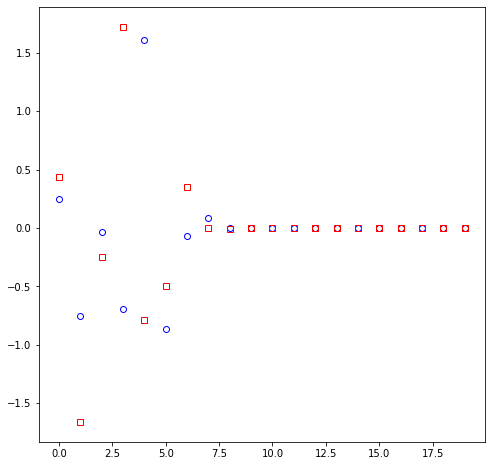

In [6]:
# Plot the coefficients.
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(range(cc.size),cc.real,'bo',mfc='None')
ax.plot(range(cc.size),cc.imag,'rs',mfc='None')

In [7]:
# Now compute Psi(r,theta)
psi = np.zeros_like(RR,dtype='complex')
for n in range(Nmax):
    psi += cc[n] * H2(n,kk*RR) * np.cos(n*theta)
# and interior to the circle, set psi=0.
psi[RR<aa] = np.complex(0)

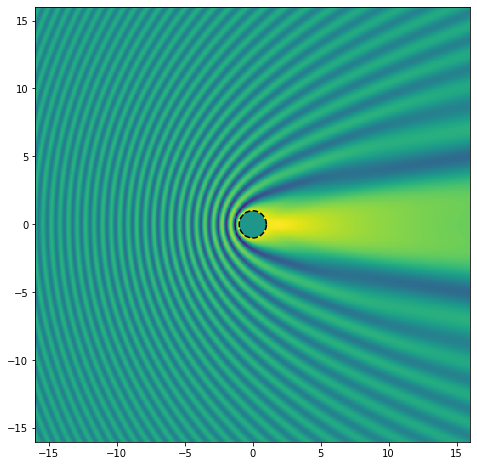

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
#
ax.imshow(np.arcsinh(np.abs(psi+inc)).T,origin='lower',extent=[xv[0],xv[-1],yv[0],yv[-1]])
# Plot the cylinder as a dashed line.
tt = np.linspace(0,2*np.pi,100,endpoint=True)
ax.plot(aa*np.cos(tt),aa*np.sin(tt),'k--')

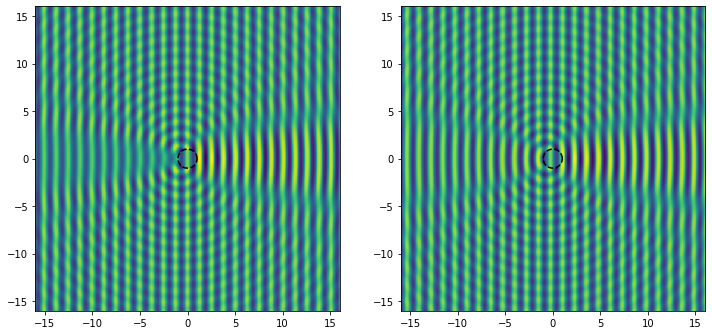

In [9]:
# Plotting just the real and imaginary parts is also
# illuminating (pun intended).
fig,ax = plt.subplots(1,2,figsize=(12,6))
#
ax[0].imshow(np.arcsinh((psi+inc).real).T,origin='lower',extent=[xv[0],xv[-1],yv[0],yv[-1]])
ax[1].imshow(np.arcsinh((psi+inc).imag).T,origin='lower',extent=[xv[0],xv[-1],yv[0],yv[-1]])
# Plot the cylinder as a dashed line.
tt = np.linspace(0,2*np.pi,100,endpoint=True)
for i in range(ax.size):
    ax[i].plot(aa*np.cos(tt),aa*np.sin(tt),'k--')